In [16]:
import os, sys
import numpy as np
import scipy as sp
import pylab as py
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import rc
from matplotlib.colors import LogNorm
from matplotlib.font_manager import FontProperties
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
rc('text',usetex=True)
%matplotlib inline
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from scipy.optimize import minimize, curve_fit
from scipy import integrate
from scipy.special import j0, j1

# Data

In [2]:
data={}
data['E288 200'] = np.loadtxt("data/reformat-E288-200.dat", skiprows=2)
data['E288 300'] = np.loadtxt("data/reformat-E288-300.dat", skiprows=2)
data['E288 400'] = np.loadtxt("data/reformat-E288-400.dat", skiprows=2)
data['E605 800'] = np.loadtxt("data/reformat-E605-800.dat", skiprows=2)
data['E772 800'] = np.loadtxt("data/reformat-E772-800.dat", skiprows=2)


In [3]:
sdata={}
sdata['E288 200'] = np.hstack((data['E288 200'], np.full((data['E288 200'].shape[0],1), 19.40)))
sdata['E288 300'] = np.hstack((data['E288 300'], np.full((data['E288 300'].shape[0],1), 23.75)))
sdata['E288 400'] = np.hstack((data['E288 400'], np.full((data['E288 400'].shape[0],1), 27.42)))
sdata['E605 800'] = np.hstack((data['E605 800'], np.full((data['E605 800'].shape[0],1), 38.77)))
sdata['E772 800'] = np.hstack((data['E772 800'], np.full((data['E772 800'].shape[0],1), 38.77)))


# QT

## test

In [8]:
def testfunc(x, N, a, b):
    return N * np.exp(-a * x ** b)

def testinte(N, a, b):
    res, err = integrate.quad(testfunc, 0, np.inf, args=(N, a, b))
    print res, err
    return res

## fit function and W(b)

In [71]:
def Wq(qt, p0, p1, p2):
    return p0 * np.exp(-p1 * qt**p2)

def Wb_int(qt, b, p0, p1, p2):
    return 2.0 * np.pi * qt * j0(b * qt) * Wq(qt, p0, p1, p2)

def Wb(b, p0, p1, p2):
    limit = int(b * 100) + 100
    res, err = integrate.quad(Wb_int, 0, np.inf, args=(b, p0, p1, p2), epsrel=1e-6, epsabs=1e-40, limit = limit)
    return res

## inverse transform data

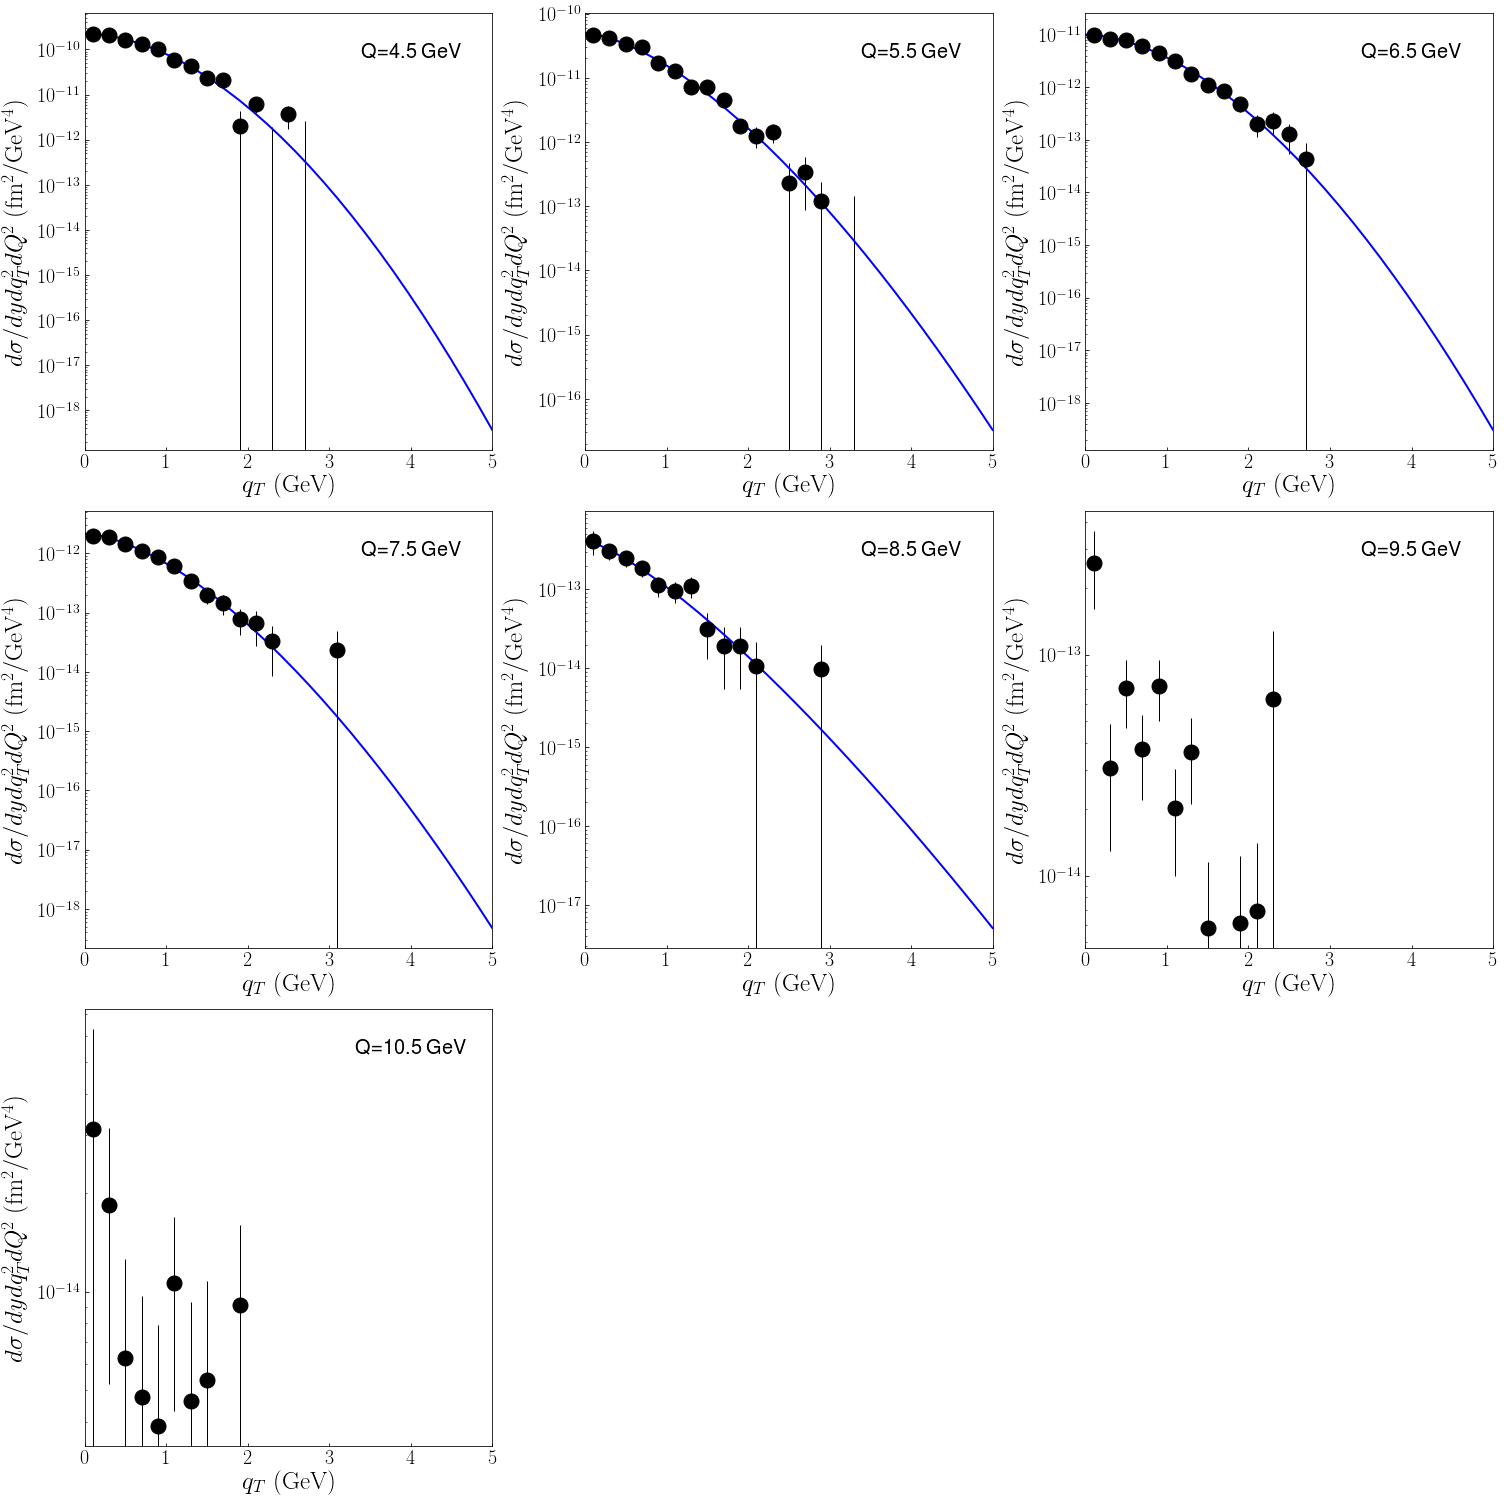

In [84]:
dset = sdata['E288 200']
Qs = np.unique(dset[:,0])
Qin = [0,]

fs = open("results/qt-E288-200.dat", "w")

nrows, ncols = Qs.size // 3 + 1, 3
fig = py.figure(figsize=(ncols*7, nrows*7))

Xb = np.linspace(0, 5, 101)
Tx = Xb

for i in range(len(Qs)):
    Q = Qs[i]
    sub = dset[:,0] == Q
    ax = fig.add_subplot(nrows, ncols, i+1)
    ax.errorbar(dset[sub,1], dset[sub,2], yerr=dset[sub,3],\
               marker='o', markersize=15, color='black', ls='none', linewidth=1)
    ax.set_xlabel(r'$q_T~\rm (GeV)$', size=25)
    ax.set_ylabel(r'$d\sigma/dydq_T^2dQ^2~\rm (fm^2/GeV^4)$', size=25)
    ax.set_xlim(0,5)
    ax.set_yscale('log')
    ax.tick_params(axis='both', which='both', direction='in', labelsize=20)
    ax.text(0.8, 0.9, 'Q=%.1f GeV' % (Q), transform = ax.transAxes, fontsize=20, horizontalalignment='center')
    if len(dset[sub]) > 5 and Q !=9.5 and Q!=10.5:
        Qin.append(Q)
        par, cov = curve_fit(Wq, dset[sub,1], dset[sub,2], sigma=dset[sub,3], maxfev=10000)
        Xq = np.linspace(0, 5, 30)
        ax.plot(Xq, Wq(Xq, par[0], par[1], par[2]), ls='-', linewidth=2, color='blue')
        Lx = []
        for b in Xb:
            Lx.append(Wb(b, par[0], par[1], par[2]))
        Tx = np.vstack((Tx, np.array(Lx)))
        
alltext = np.vstack((Qin, Tx.T))
np.savetxt('results/Wb-E288-200.dat', alltext, fmt='%.3e', delimiter='\t')

fig.tight_layout()

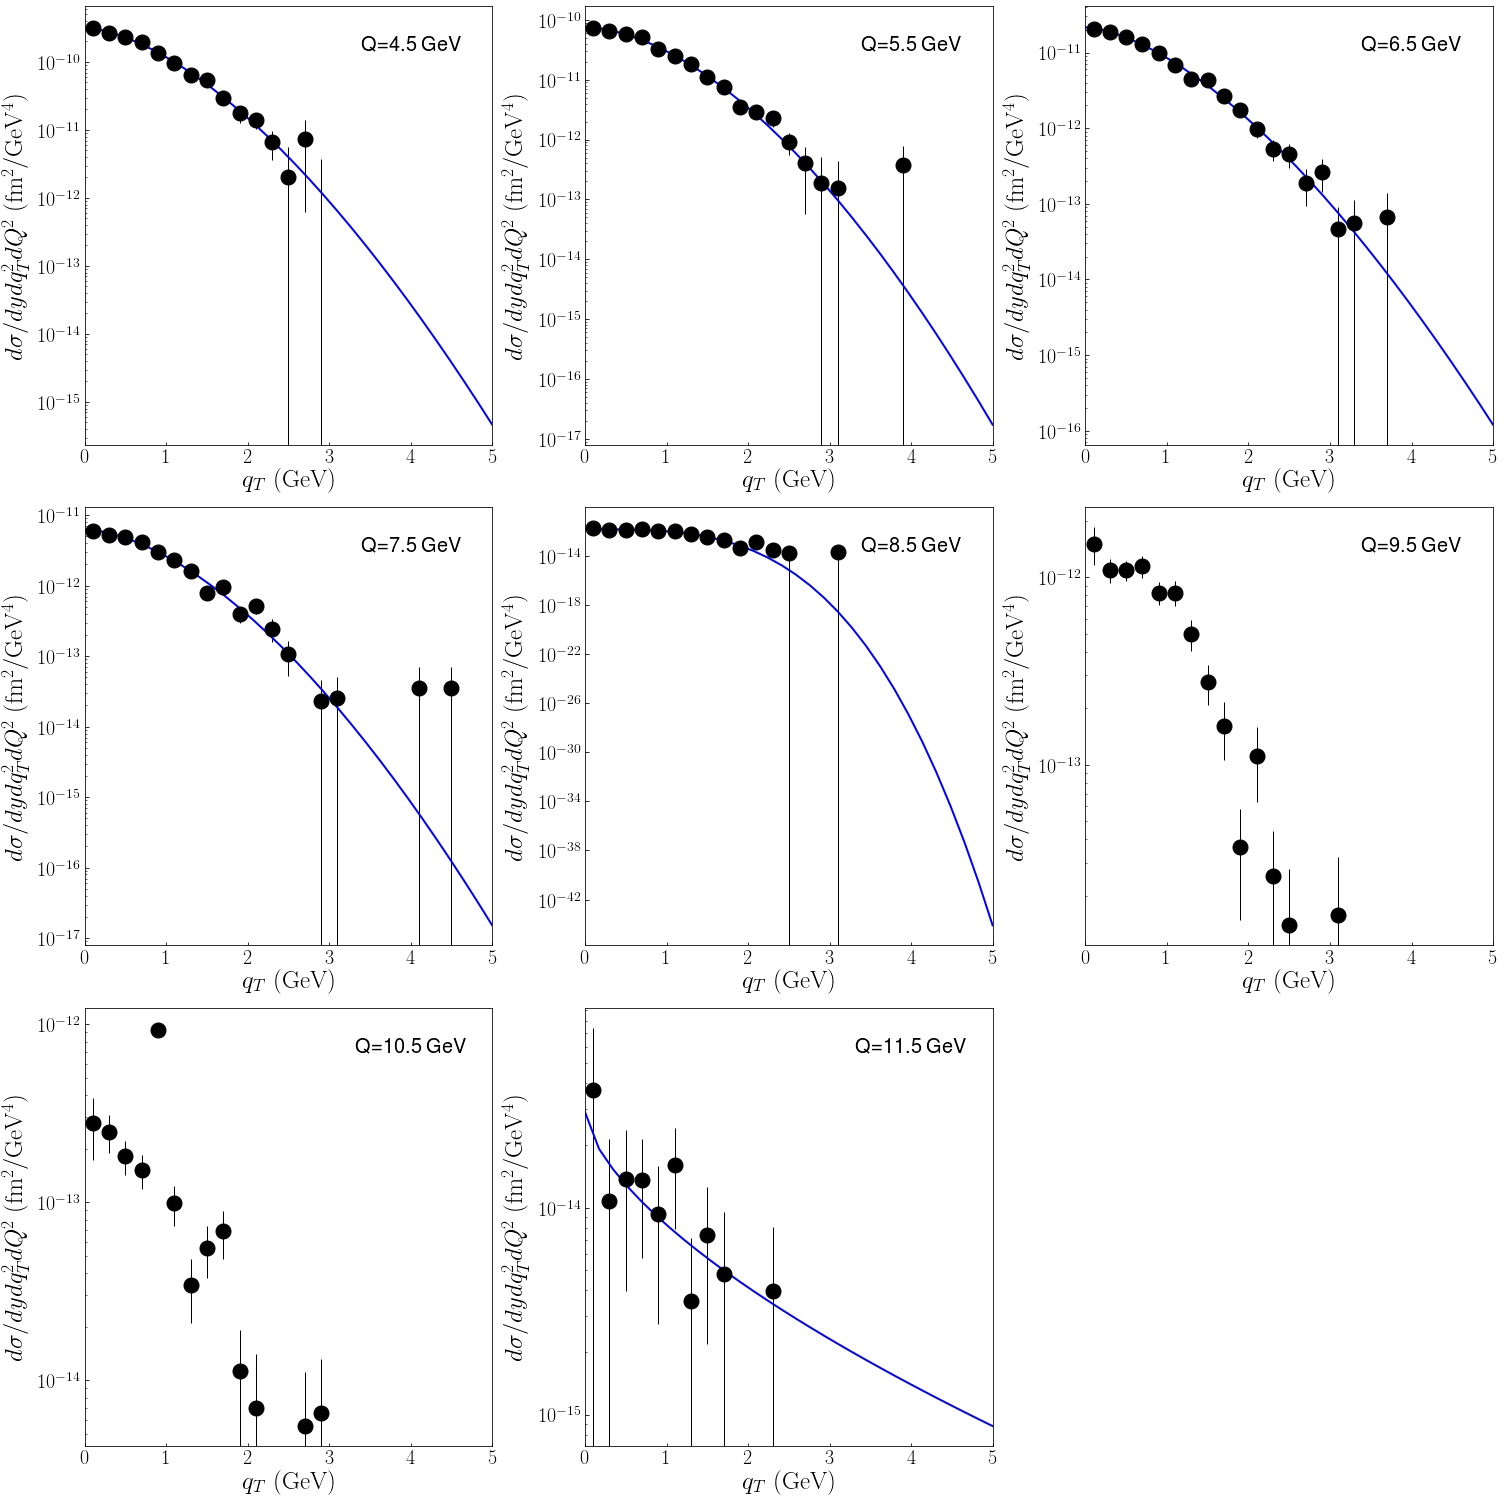

In [85]:
dset = sdata['E288 300']
Qs = np.unique(dset[:,0])
Qin = [0,]

nrows, ncols = Qs.size // 3 + 1, 3
fig = py.figure(figsize=(ncols*7, nrows*7))

Xb = np.linspace(0, 5, 101)
Tx = Xb

for i in range(len(Qs)):
    Q = Qs[i]
    sub = dset[:,0] == Q
    ax = fig.add_subplot(nrows, ncols, i+1)
    ax.errorbar(dset[sub,1], dset[sub,2], yerr=dset[sub,3],\
               marker='o', markersize=15, color='black', ls='none', linewidth=1)
    ax.set_xlabel(r'$q_T~\rm (GeV)$', size=25)
    ax.set_ylabel(r'$d\sigma/dydq_T^2dQ^2~\rm (fm^2/GeV^4)$', size=25)
    ax.set_xlim(0,5)
    ax.set_yscale('log')
    ax.tick_params(axis='both', which='both', direction='in', labelsize=20)
    ax.text(0.8, 0.9, 'Q=%.1f GeV' % (Q), transform = ax.transAxes, fontsize=20, horizontalalignment='center')
    if len(dset[sub]) > 5 and Q !=9.5 and Q!=10.5:
        Qin.append(Q)
        par, cov = curve_fit(Wq, dset[sub,1], dset[sub,2], sigma=dset[sub,3], maxfev=10000)
        Xq = np.linspace(0, 5, 30)
        ax.plot(Xq, Wq(Xq, par[0], par[1], par[2]), ls='-', linewidth=2, color='blue')
        Lx = []
        for b in Xb:
            Lx.append(Wb(b, par[0], par[1], par[2]))
        Tx = np.vstack((Tx, np.array(Lx)))
        
alltext = np.vstack((Qin, Tx.T))
np.savetxt('results/Wb-E288-300.dat', alltext, fmt='%.3e', delimiter='\t')

fig.tight_layout()

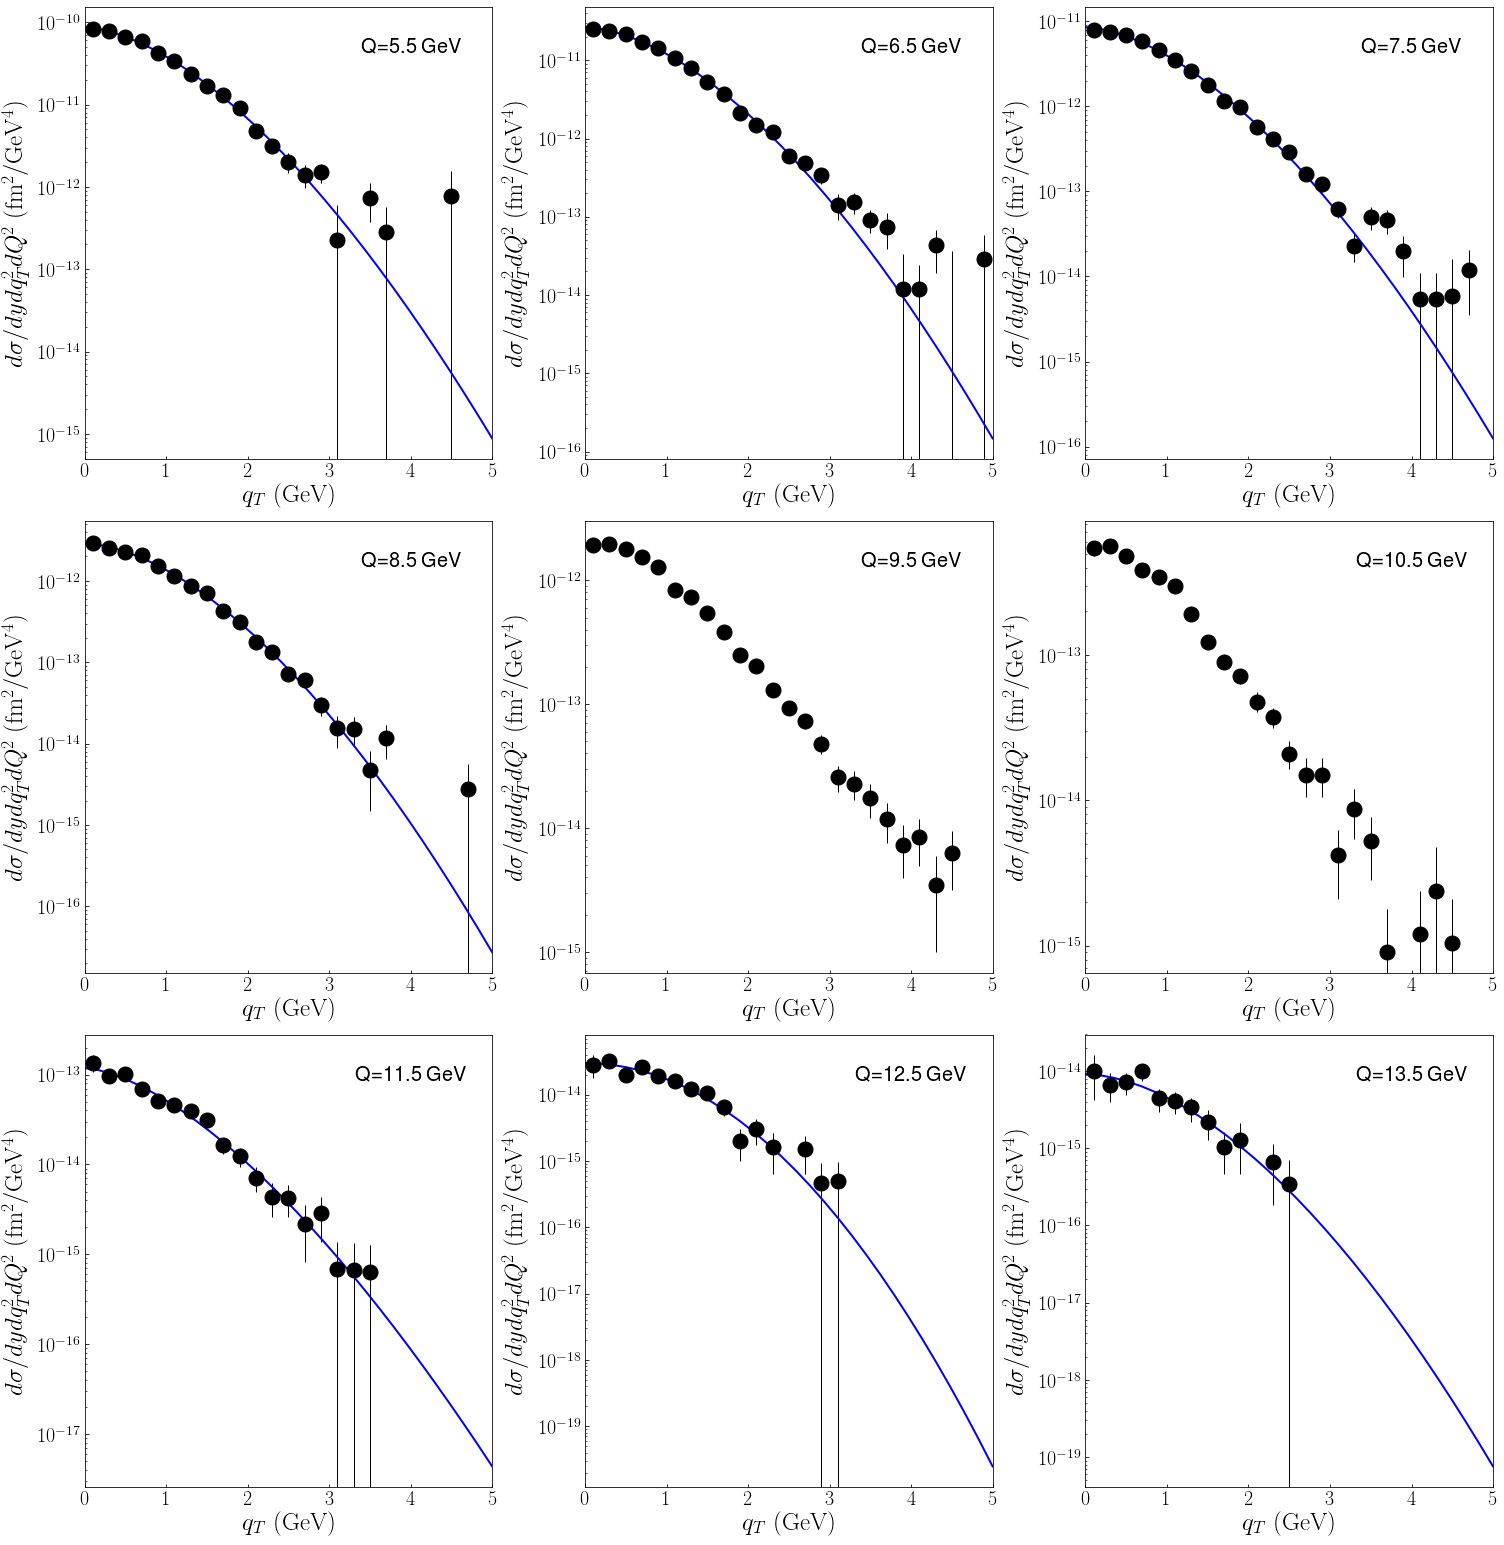

In [86]:
dset = sdata['E288 400']
Qs = np.unique(dset[:,0])
Qin = [0,]

nrows, ncols = Qs.size // 3 + 1, 3
fig = py.figure(figsize=(ncols*7, nrows*7))

Xb = np.linspace(0, 5, 101)
Tx = Xb

for i in range(len(Qs)):
    Q = Qs[i]
    sub = dset[:,0] == Q
    ax = fig.add_subplot(nrows, ncols, i+1)
    ax.errorbar(dset[sub,1], dset[sub,2], yerr=dset[sub,3],\
               marker='o', markersize=15, color='black', ls='none', linewidth=1)
    ax.set_xlabel(r'$q_T~\rm (GeV)$', size=25)
    ax.set_ylabel(r'$d\sigma/dydq_T^2dQ^2~\rm (fm^2/GeV^4)$', size=25)
    ax.set_xlim(0,5)
    ax.set_yscale('log')
    ax.tick_params(axis='both', which='both', direction='in', labelsize=20)
    ax.text(0.8, 0.9, 'Q=%.1f GeV' % (Q), transform = ax.transAxes, fontsize=20, horizontalalignment='center')
    if len(dset[sub]) > 5 and Q !=9.5 and Q!=10.5:
        Qin.append(Q)
        par, cov = curve_fit(Wq, dset[sub,1], dset[sub,2], sigma=dset[sub,3], maxfev=10000)
        Xq = np.linspace(0, 5, 30)
        ax.plot(Xq, Wq(Xq, par[0], par[1], par[2]), ls='-', linewidth=2, color='blue')
        Lx = []
        for b in Xb:
            Lx.append(Wb(b, par[0], par[1], par[2]))
        Tx = np.vstack((Tx, np.array(Lx)))
        
alltext = np.vstack((Qin, Tx.T))
np.savetxt('results/Wb-E288-400.dat', alltext, fmt='%.3e', delimiter='\t')

fig.tight_layout()

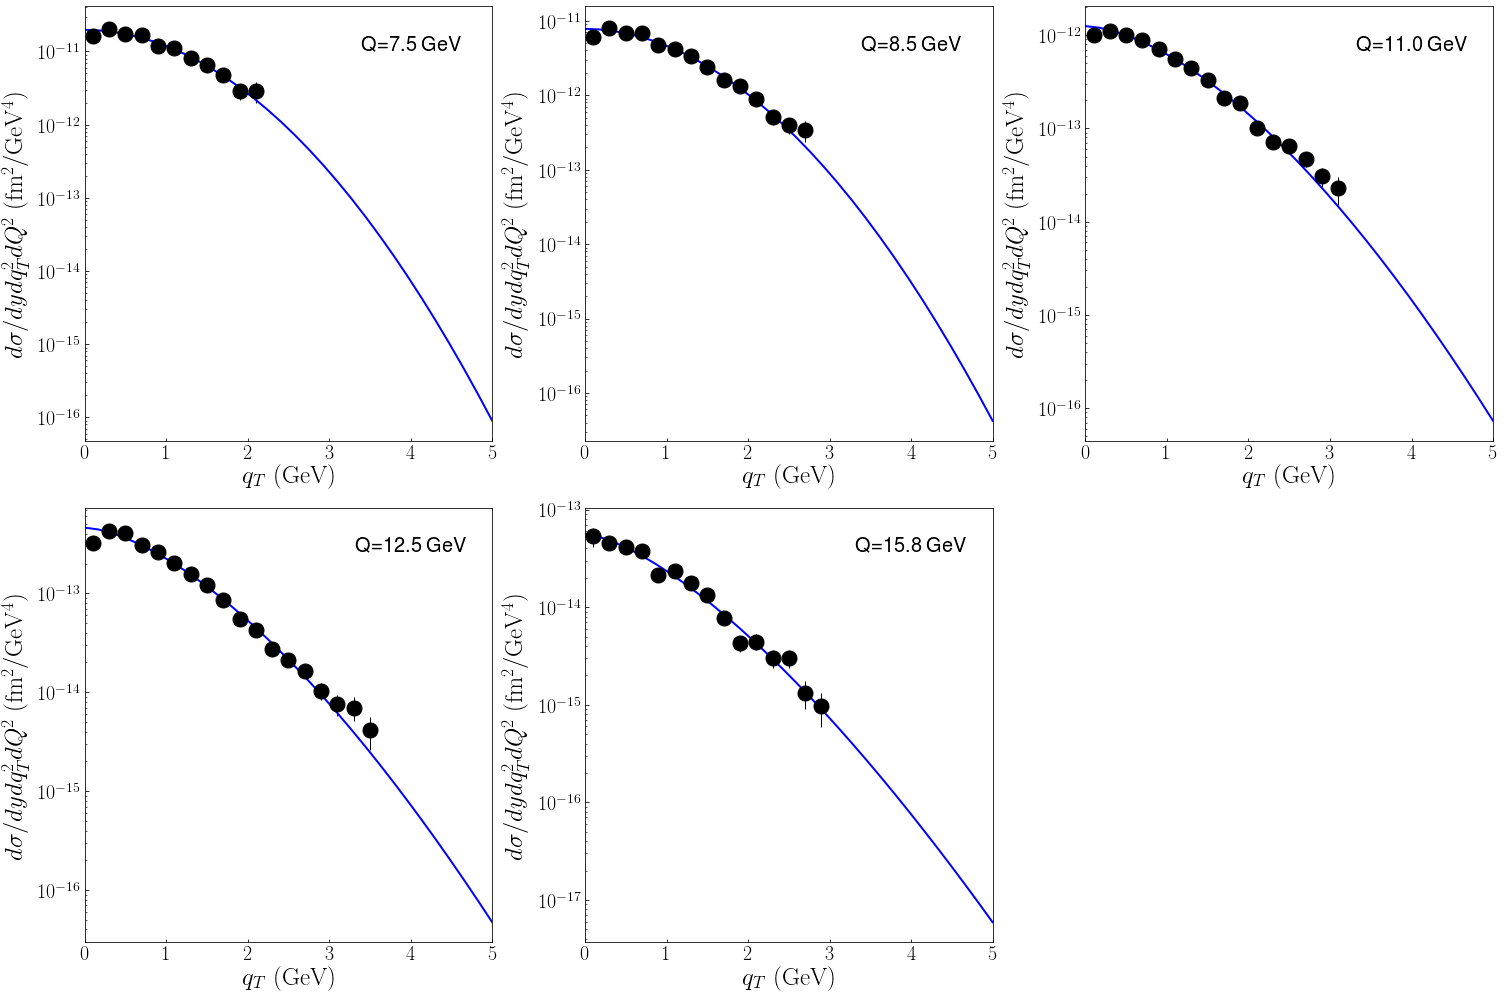

In [87]:
dset = sdata['E605 800']
Qs = np.unique(dset[:,0])
Qin = [0,]

nrows, ncols = Qs.size // 3 + 1, 3
fig = py.figure(figsize=(ncols*7, nrows*7))

Xb = np.linspace(0, 5, 101)
Tx = Xb

for i in range(len(Qs)):
    Q = Qs[i]
    sub = dset[:,0] == Q
    ax = fig.add_subplot(nrows, ncols, i+1)
    ax.errorbar(dset[sub,1], dset[sub,2], yerr=dset[sub,3],\
               marker='o', markersize=15, color='black', ls='none', linewidth=1)
    ax.set_xlabel(r'$q_T~\rm (GeV)$', size=25)
    ax.set_ylabel(r'$d\sigma/dydq_T^2dQ^2~\rm (fm^2/GeV^4)$', size=25)
    ax.set_xlim(0,5)
    ax.set_yscale('log')
    ax.tick_params(axis='both', which='both', direction='in', labelsize=20)
    ax.text(0.8, 0.9, 'Q=%.1f GeV' % (Q), transform = ax.transAxes, fontsize=20, horizontalalignment='center')
    if len(dset[sub]) > 5 and Q !=9.5 and Q!=10.5:
        Qin.append(Q)
        par, cov = curve_fit(Wq, dset[sub,1], dset[sub,2], sigma=dset[sub,3], maxfev=10000)
        Xq = np.linspace(0, 5, 30)
        ax.plot(Xq, Wq(Xq, par[0], par[1], par[2]), ls='-', linewidth=2, color='blue')
        Lx = []
        for b in Xb:
            Lx.append(Wb(b, par[0], par[1], par[2]))
        Tx = np.vstack((Tx, np.array(Lx)))
        
alltext = np.vstack((Qin, Tx.T))
np.savetxt('results/Wb-E605-800.dat', alltext, fmt='%.3e', delimiter='\t')

fig.tight_layout()

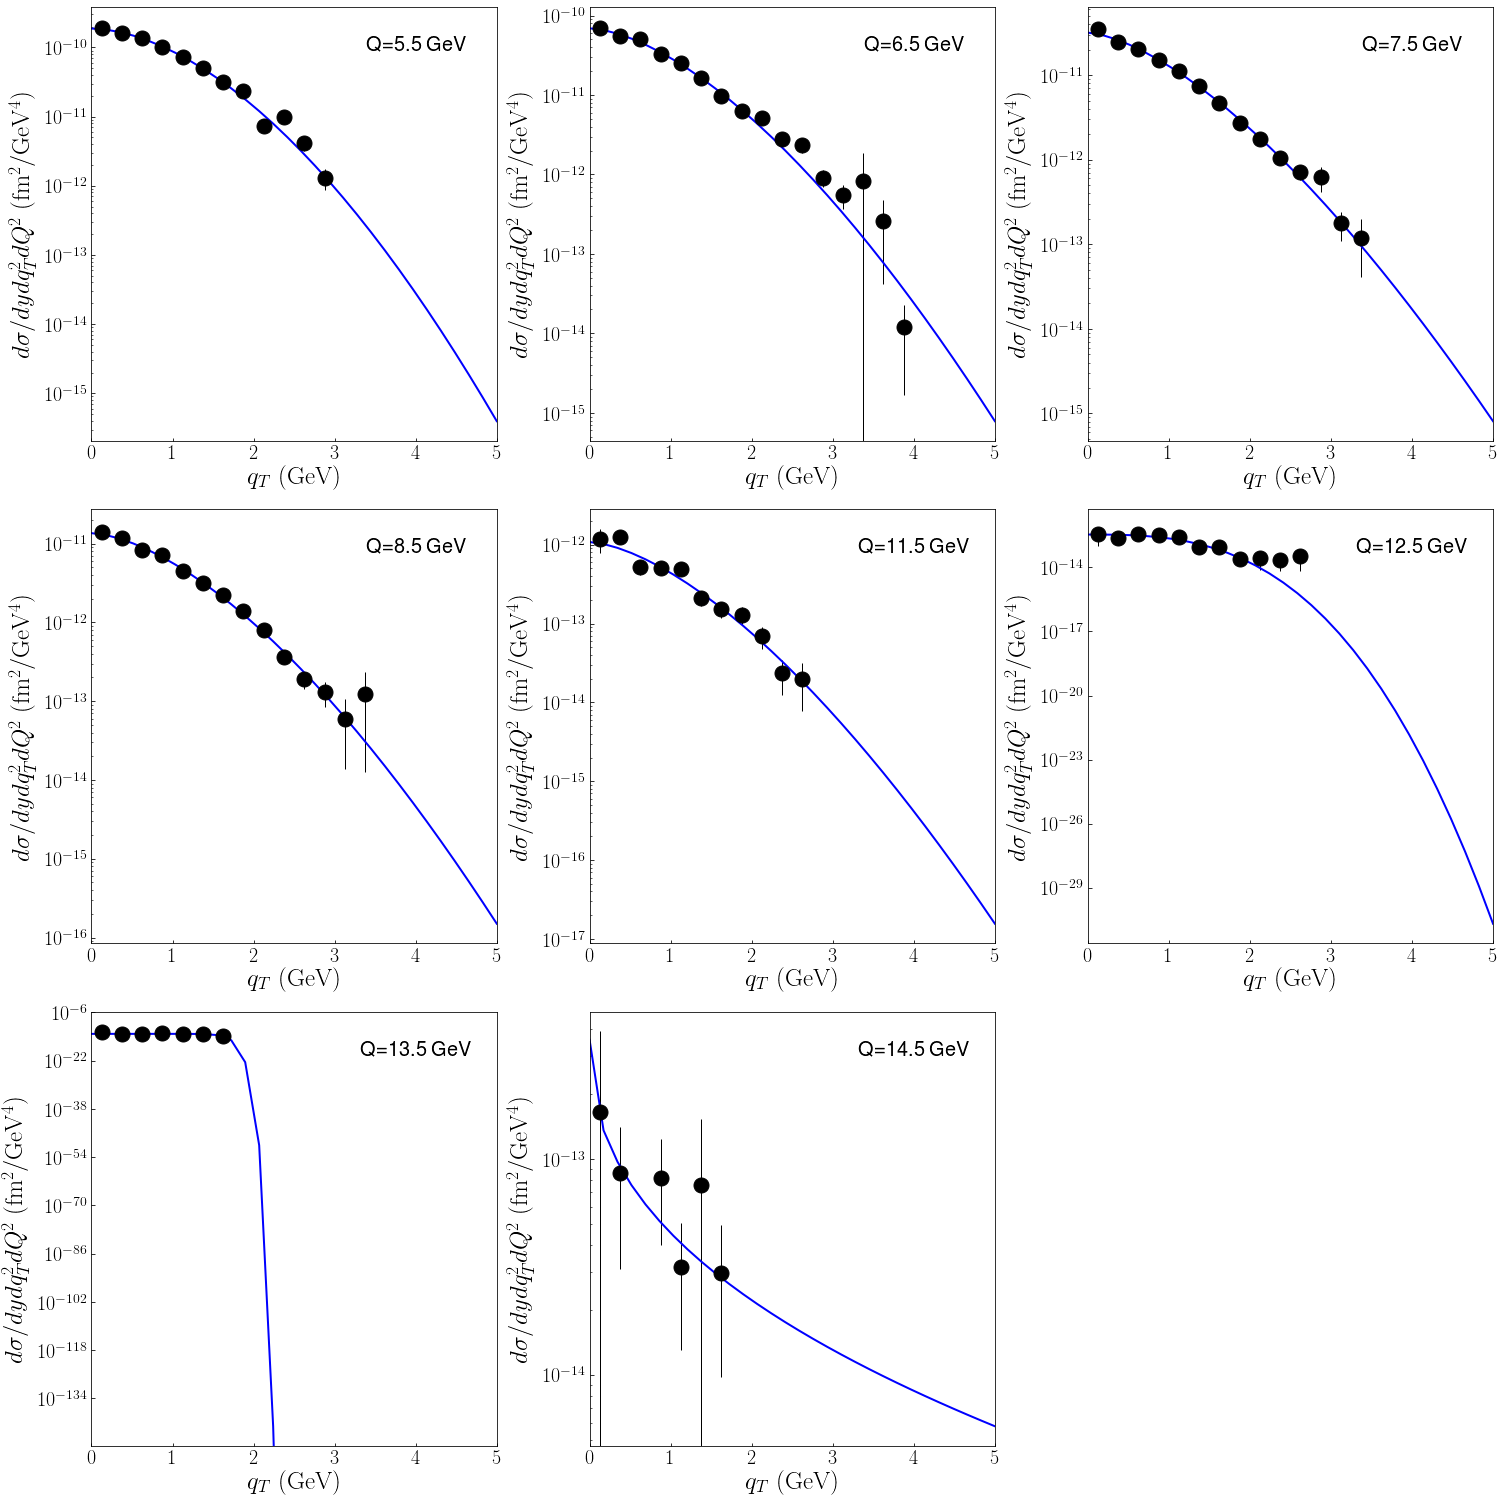

In [88]:
dset = sdata['E772 800']
Qs = np.unique(dset[:,0])
Qin = [0,]

nrows, ncols = Qs.size // 3 + 1, 3
fig = py.figure(figsize=(ncols*7, nrows*7))

Xb = np.linspace(0, 5, 101)
Tx = Xb

for i in range(len(Qs)):
    Q = Qs[i]
    sub = dset[:,0] == Q
    ax = fig.add_subplot(nrows, ncols, i+1)
    ax.errorbar(dset[sub,1], dset[sub,2], yerr=dset[sub,3],\
               marker='o', markersize=15, color='black', ls='none', linewidth=1)
    ax.set_xlabel(r'$q_T~\rm (GeV)$', size=25)
    ax.set_ylabel(r'$d\sigma/dydq_T^2dQ^2~\rm (fm^2/GeV^4)$', size=25)
    ax.set_xlim(0,5)
    ax.set_yscale('log')
    ax.tick_params(axis='both', which='both', direction='in', labelsize=20)
    ax.text(0.8, 0.9, 'Q=%.1f GeV' % (Q), transform = ax.transAxes, fontsize=20, horizontalalignment='center')
    if len(dset[sub]) > 5 and Q !=9.5 and Q!=10.5:
        Qin.append(Q)
        par, cov = curve_fit(Wq, dset[sub,1], dset[sub,2], sigma=dset[sub,3], maxfev=10000)
        Xq = np.linspace(0, 5, 30)
        ax.plot(Xq, Wq(Xq, par[0], par[1], par[2]), ls='-', linewidth=2, color='blue')
        Lx = []
        for b in Xb:
            Lx.append(Wb(b, par[0], par[1], par[2]))
        Tx = np.vstack((Tx, np.array(Lx)))
        
alltext = np.vstack((Qin, Tx.T))
np.savetxt('results/Wb-E772-800.dat', alltext, fmt='%.3e', delimiter='\t')

fig.tight_layout()

# Plot

## load Wb

In [90]:
Wbs = {}

Wbs['E288 200'] = np.loadtxt('results/Wb-E288-200.dat', skiprows=0)
Wbs['E288 300'] = np.loadtxt('results/Wb-E288-300.dat', skiprows=0)
Wbs['E288 400'] = np.loadtxt('results/Wb-E288-400.dat', skiprows=0)
Wbs['E605 800'] = np.loadtxt('results/Wb-E605-800.dat', skiprows=0)
Wbs['E772 800'] = np.loadtxt('results/Wb-E772-800.dat', skiprows=0)

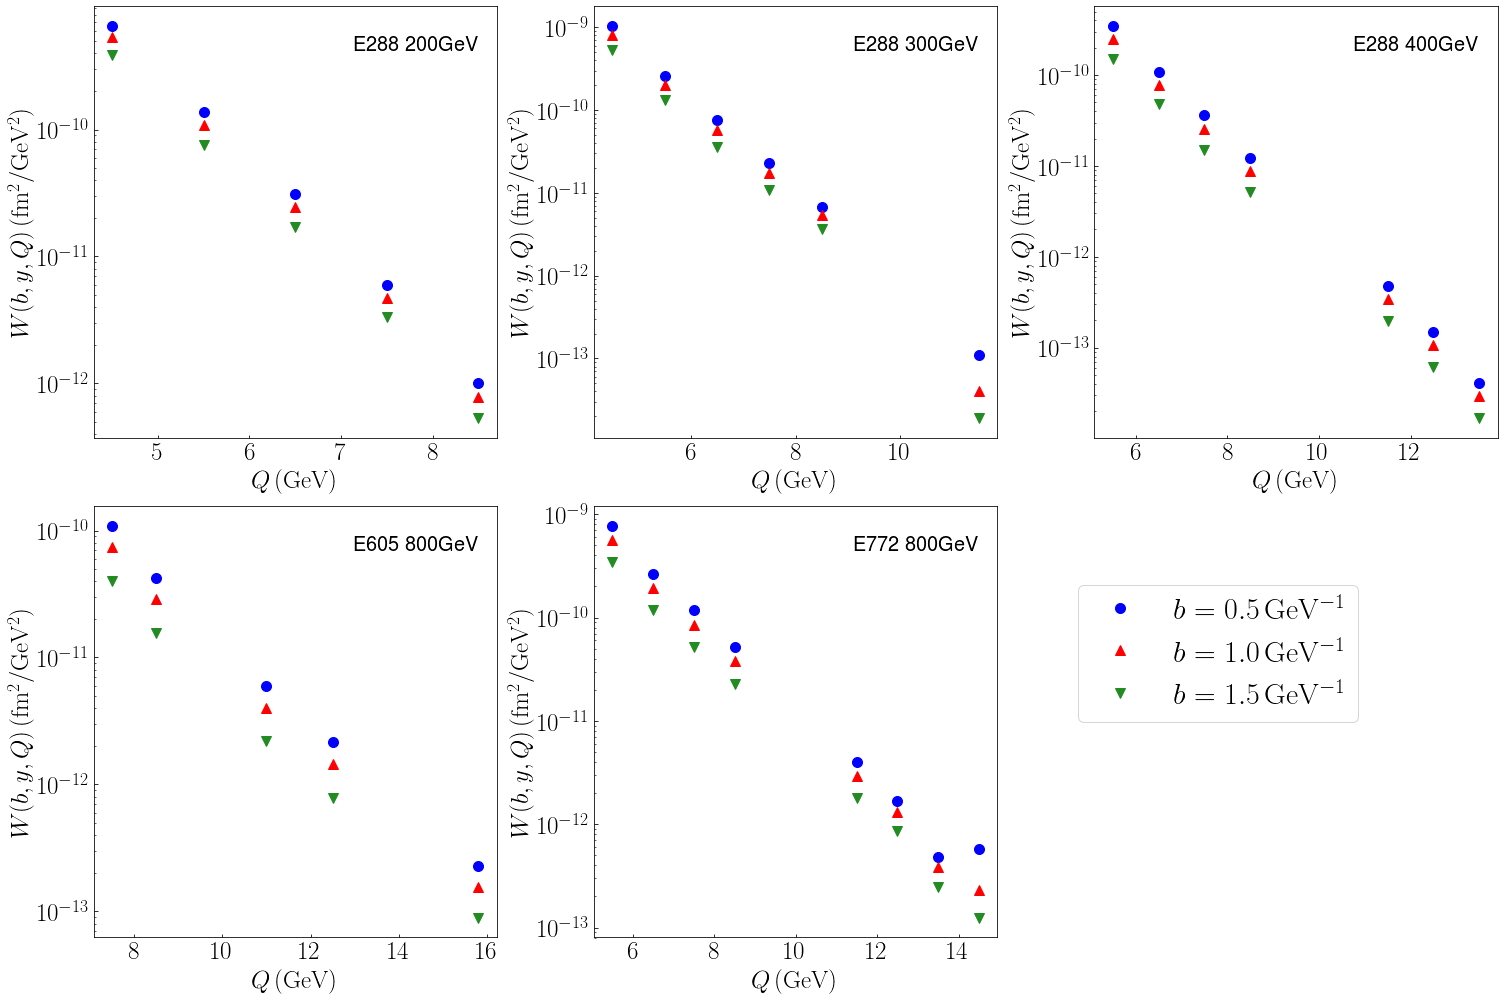

In [115]:
b1 = 0.5
b2 = 1.0
b3 = 1.5

nrows, ncols = 2, 3
fig = py.figure(figsize=(ncols*7, nrows*7))

ax = fig.add_subplot(nrows, ncols, 1)
W = Wbs['E288 200']
id1, id2, id3 = W[:,0] == b1, W[:,0] == b2, W[:,0] == b3
ax.errorbar(W[0,1:], W[id1,1:], marker='o', markersize=10, ls='none', linewidth=1, color='blue')
ax.errorbar(W[0,1:], W[id2,1:], marker='^', markersize=10, ls='none', linewidth=1, color='red')
ax.errorbar(W[0,1:], W[id3,1:], marker='v', markersize=10, ls='none', linewidth=1, color='forestgreen')
#ax.set_xlim(4,9)
#ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel(r'$Q\,\rm(GeV)$', size=25)
ax.set_ylabel(r'$W(b,y,Q)\,\rm(fm^2/GeV^2)$', size=25)
ax.tick_params(axis='both', which='both', direction='in', labelsize=25)
ax.text(0.8, 0.9, 'E288 200GeV', transform=ax.transAxes, fontsize=20, horizontalalignment='center')

ax = fig.add_subplot(nrows, ncols, 2)
W = Wbs['E288 300']
id1, id2, id3 = W[:,0] == b1, W[:,0] == b2, W[:,0] == b3
ax.errorbar(W[0,1:], W[id1,1:], marker='o', markersize=10, ls='none', linewidth=1, color='blue')
ax.errorbar(W[0,1:], W[id2,1:], marker='^', markersize=10, ls='none', linewidth=1, color='red')
ax.errorbar(W[0,1:], W[id3,1:], marker='v', markersize=10, ls='none', linewidth=1, color='forestgreen')
#ax.set_xlim(4,12)
#ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel(r'$Q\,\rm(GeV)$', size=25)
ax.set_ylabel(r'$W(b,y,Q)\,\rm(fm^2/GeV^2)$', size=25)
ax.tick_params(axis='both', which='both', direction='in', labelsize=25)
ax.text(0.8, 0.9, 'E288 300GeV', transform=ax.transAxes, fontsize=20, horizontalalignment='center')

ax = fig.add_subplot(nrows, ncols, 3)
W = Wbs['E288 400']
id1, id2, id3 = W[:,0] == b1, W[:,0] == b2, W[:,0] == b3
ax.errorbar(W[0,1:], W[id1,1:], marker='o', markersize=10, ls='none', linewidth=1, color='blue')
ax.errorbar(W[0,1:], W[id2,1:], marker='^', markersize=10, ls='none', linewidth=1, color='red')
ax.errorbar(W[0,1:], W[id3,1:], marker='v', markersize=10, ls='none', linewidth=1, color='forestgreen')
#ax.set_xlim(4,12)
#ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel(r'$Q\,\rm(GeV)$', size=25)
ax.set_ylabel(r'$W(b,y,Q)\,\rm(fm^2/GeV^2)$', size=25)
ax.tick_params(axis='both', which='both', direction='in', labelsize=25)
ax.text(0.8, 0.9, 'E288 400GeV', transform=ax.transAxes, fontsize=20, horizontalalignment='center')

ax = fig.add_subplot(nrows, ncols, 4)
W = Wbs['E605 800']
id1, id2, id3 = W[:,0] == b1, W[:,0] == b2, W[:,0] == b3
ax.errorbar(W[0,1:], W[id1,1:], marker='o', markersize=10, ls='none', linewidth=1, color='blue')
ax.errorbar(W[0,1:], W[id2,1:], marker='^', markersize=10, ls='none', linewidth=1, color='red')
ax.errorbar(W[0,1:], W[id3,1:], marker='v', markersize=10, ls='none', linewidth=1, color='forestgreen')
#ax.set_xlim(4,12)
#ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel(r'$Q\,\rm(GeV)$', size=25)
ax.set_ylabel(r'$W(b,y,Q)\,\rm(fm^2/GeV^2)$', size=25)
ax.tick_params(axis='both', which='both', direction='in', labelsize=25)
ax.text(0.8, 0.9, 'E605 800GeV', transform=ax.transAxes, fontsize=20, horizontalalignment='center')

ax = fig.add_subplot(nrows, ncols, 5)
W = Wbs['E772 800']
id1, id2, id3 = W[:,0] == b1, W[:,0] == b2, W[:,0] == b3
ax.errorbar(W[0,1:], W[id1,1:], marker='o', markersize=10, ls='none', linewidth=1, color='blue', label=r'$b=0.5\,\rm GeV^{-1}$')
ax.errorbar(W[0,1:], W[id2,1:], marker='^', markersize=10, ls='none', linewidth=1, color='red', label=r'$b=1.0\,\rm GeV^{-1}$')
ax.errorbar(W[0,1:], W[id3,1:], marker='v', markersize=10, ls='none', linewidth=1, color='forestgreen', label=r'$b=1.5\,\rm GeV^{-1}$')
#ax.set_xlim(4,12)
#ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel(r'$Q\,\rm(GeV)$', size=25)
ax.set_ylabel(r'$W(b,y,Q)\,\rm(fm^2/GeV^2)$', size=25)
ax.tick_params(axis='both', which='both', direction='in', labelsize=25)
ax.text(0.8, 0.9, 'E772 800GeV', transform=ax.transAxes, fontsize=20, horizontalalignment='center')
ax.legend(loc=(1.2,0.5), fontsize=30)

fig.tight_layout()